# Duplicates, outliers and missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/notebooks/Datasets/Cleaning/data4.csv")

In [3]:
data.head()

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
0,S001,Male,20.0,India,25,78.5,10,Pass
1,S002,Female,22.0,USA,30,82.0,12,Pass
2,S003,Male,19.0,Sri Lanka,18,45.0,8,Fail
3,S004,Female,21.0,India,28,88.0,9,Pass
4,S005,Female,18.0,USA,15,35.0,5,Fail


## Duplicate rows

In [4]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23    False
24    False
dtype: bool

In [5]:
data[data.duplicated()].shape

(3, 8)

In [6]:
data.shape

(25, 8)

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(22, 8)

## Outliers

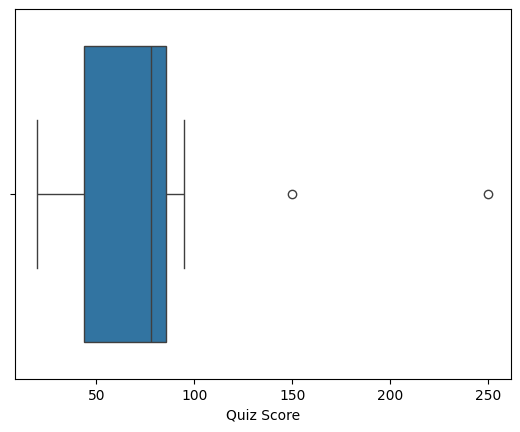

In [9]:
sns.boxplot(x=data['Quiz Score'])
plt.show()

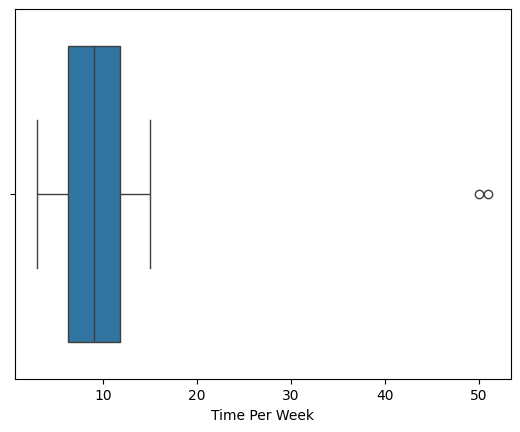

In [10]:
sns.boxplot(x=data['Time Per Week'])
plt.show()

In [11]:
numeric_cols = data.select_dtypes(include='number').columns

In [12]:
q1 = data[numeric_cols].quantile(0.25)
q3 = data[numeric_cols].quantile(0.75)
iqr = q3 - q1

In [13]:
condition = ~((data[numeric_cols] < (q1 - 1.5 * iqr)) | (data[numeric_cols] > (q3 + 1.5 * iqr))).any(axis=1)

In [14]:
data = data[condition]

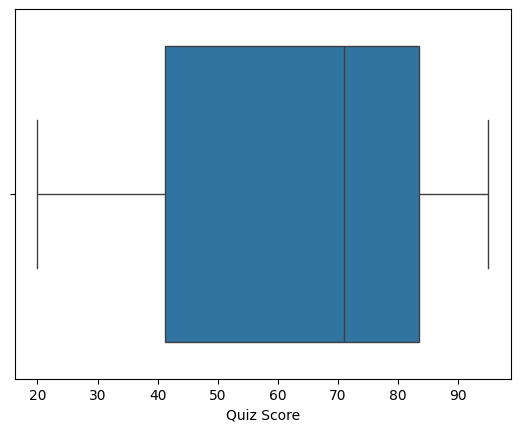

In [15]:
sns.boxplot(x=data['Quiz Score'])
plt.show()

## Missing values

In [16]:
missing_values_count = data.isnull().sum()

In [17]:
missing_values_count[0:10]

StudentID            0
Gender               0
Age                  2
Country              0
Lessons Completed    0
Quiz Score           2
Time Per Week        0
Result               0
dtype: int64

In [18]:
total_cells = np.prod(data.shape)
total_missing = missing_values_count.sum()

In [19]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

2.5


## Drop missing values

* This approach will drop all the rows that contains at-least one missing value.
* The ***axis=1*** will determine the number of values to consider to drop a row.

In [20]:
data_dropped = data.dropna(axis=1)

In [21]:
data_dropped.head()

,StudentID,Gender,Country,Lessons Completed,Time Per Week,Result
0,S001,Male,India,25,10,Pass
1,S002,Female,USA,30,12,Pass
2,S003,Male,Sri Lanka,18,8,Fail
3,S004,Female,India,28,9,Pass
4,S005,Female,USA,15,5,Fail


In [22]:
new_missing_values_count = data_dropped.isnull().sum()
new_missing_values_count[0:10]

StudentID            0
Gender               0
Country              0
Lessons Completed    0
Time Per Week        0
Result               0
dtype: int64

In [23]:
data_dropped.shape

(20, 6)

## Replacing missing values

* The ***fillna()*** in Pandas can be used to replace missing values with something else that we specify.

### Replace all the missing values with a common value

* In here all the missing values will be replaced by ***0***.

In [24]:
repl_all_mis_data = data.fillna(0)

In [25]:
repl_all_mis_data.head()

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
0,S001,Male,20.0,India,25,78.5,10,Pass
1,S002,Female,22.0,USA,30,82.0,12,Pass
2,S003,Male,19.0,Sri Lanka,18,45.0,8,Fail
3,S004,Female,21.0,India,28,88.0,9,Pass
4,S005,Female,18.0,USA,15,35.0,5,Fail


In [26]:
new_missing_values_count = repl_all_mis_data.isnull().sum()
new_missing_values_count[0:10]

StudentID            0
Gender               0
Age                  0
Country              0
Lessons Completed    0
Quiz Score           0
Time Per Week        0
Result               0
dtype: int64

### Replace missing values with the value of the row directly below in the same column

In [27]:
repl_bfill_data = data.bfill(axis=0).fillna(0)

In [28]:
new_missing_values_count = repl_bfill_data.isnull().sum()
new_missing_values_count[0:10]

StudentID            0
Gender               0
Age                  0
Country              0
Lessons Completed    0
Quiz Score           0
Time Per Week        0
Result               0
dtype: int64

In [29]:
repl_bfill_data.head()

,StudentID,Gender,Age,Country,Lessons Completed,Quiz Score,Time Per Week,Result
0,S001,Male,20.0,India,25,78.5,10,Pass
1,S002,Female,22.0,USA,30,82.0,12,Pass
2,S003,Male,19.0,Sri Lanka,18,45.0,8,Fail
3,S004,Female,21.0,India,28,88.0,9,Pass
4,S005,Female,18.0,USA,15,35.0,5,Fail


-----------

In [30]:
data.to_csv("Data/cleaned_data.csv", index=False)